In [1]:
##Version español.
##Voy a utilizar un dataframe que contiene informacion sobre distintos autos para generar modelos que predigan sus precios. Luego voy a seleccionar el mejor modelo.

#Importo las librerias necesarias para el analisis

import pandas as pd  
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Voy a realizar un heatmap para ver la relación entre las características de cada auto y su precio.

In [4]:
df_corr=df.corr()
df_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [5]:
df_price=df_corr[["price"]].copy() ##Creo un df que muestra la correlación entre cada variable numérica y el precio.
df_price.sort_values(by="price",ascending=True,inplace=True)
df_price

,price
highway-mpg,-0.704692
city-mpg,-0.686571
gas,-0.110326
peak-rpm,-0.101616
symboling,-0.082391
compression-ratio,0.071107
stroke,0.082310
diesel,0.110326
normalized-losses,0.133999
height,0.135486


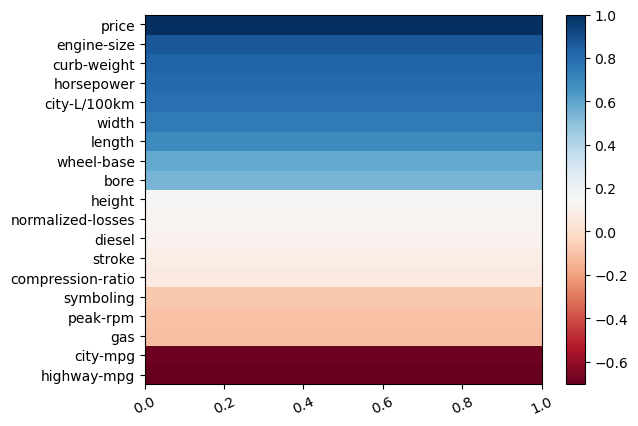

In [6]:
fig, ax = plt.subplots()
im = ax.pcolor(df_price, cmap='RdBu')

#label names
row_labels = df_price.index.tolist()

#move ticks and labels to the center
ax.set_yticks(np.arange(df_price.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_yticklabels(row_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=25)

fig.colorbar(im)
plt.show()

Se puede visualizar fácilmente las variables que tienen una correlación con el precio, siendo estas las que toman valores más lejanos al 0.

Comprobemos esto con algunos gráficos.

Se buscan las variables con un "Correlation Coefficient" cercano a 1 y un "P-value" menor a 0,01.

In [9]:
import seaborn as sns
from scipy import stats

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


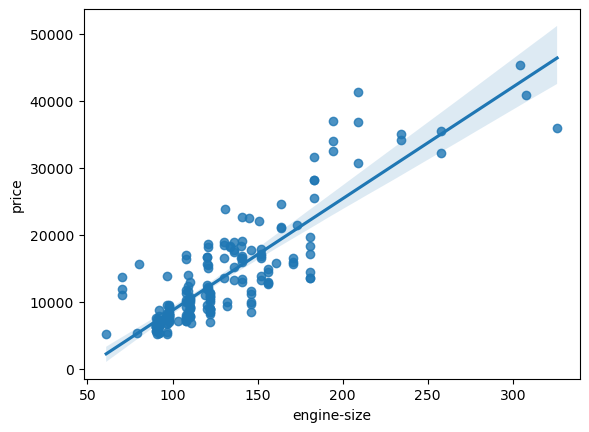

In [14]:
sns.regplot(x="engine-size",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144477352e-31


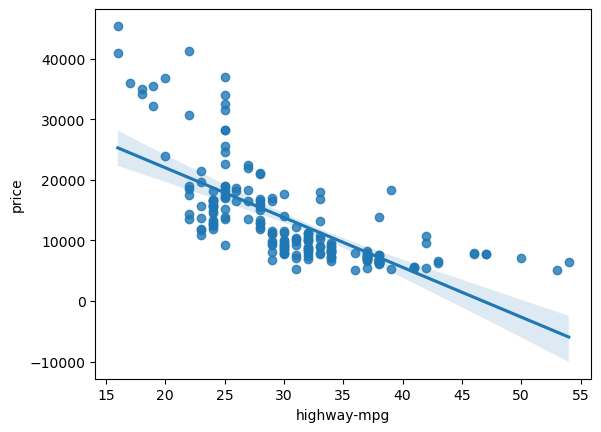

In [12]:
sns.regplot(x="highway-mpg",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1354863075680597  with a P-value of P = 0.055146273251013435


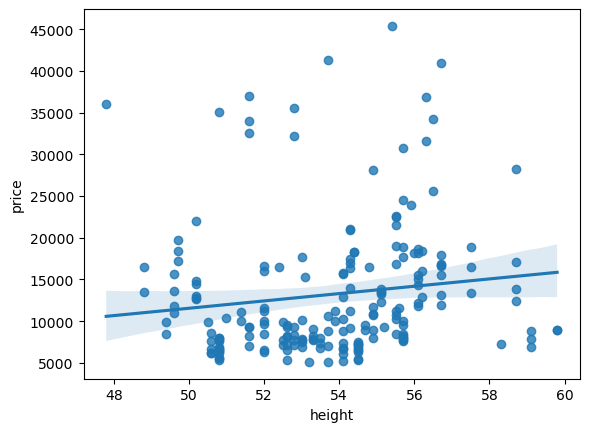

In [13]:
sns.regplot(x="height",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['height'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.08239118716962358  with a P-value of P = 0.2449148765716521


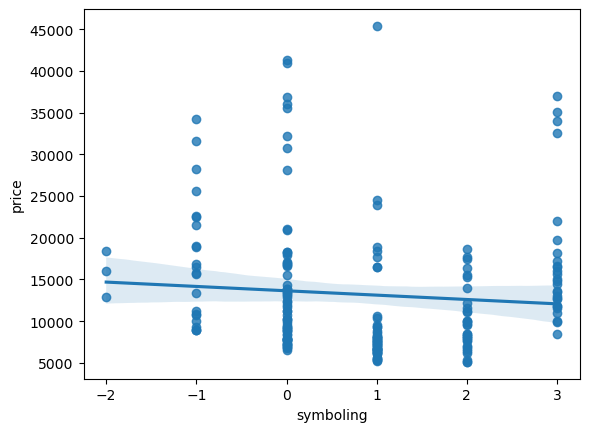

In [15]:
sns.regplot(x="symboling",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.11032556467564855  with a P-value of P = 0.11896254438091342


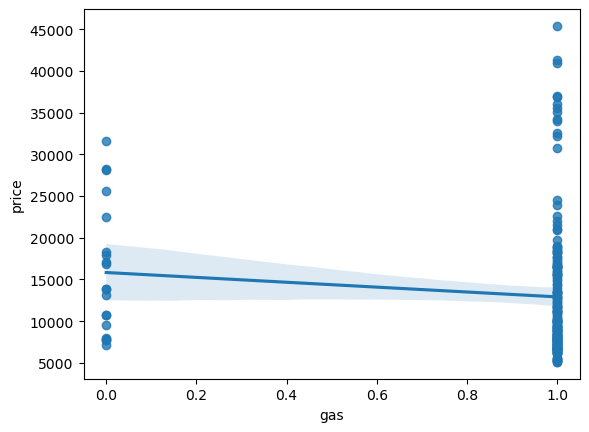

In [17]:
sns.regplot(x="gas",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['gas'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


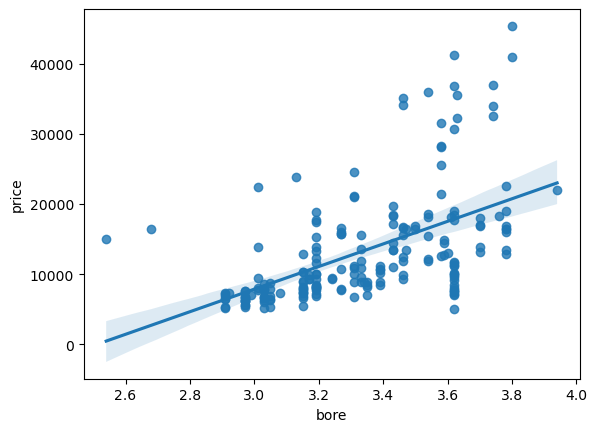

In [18]:
sns.regplot(x="bore",y="price",data=df)
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

En conclusión, las variables numéricas a tener en cuenta al momento de realizar el modelo predictivo son:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Ya encontramos las principales variables numéricas que inciden en el precio de los autos.
Analicemos ahora las variables categóricas por medio del metodo ANOVA (Analysis Of Variance).

In [21]:
df.describe(include=['object']) #Veamos una descripcion de las variables categóricas.

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


ANOVA es un método que analiza qué tan diferentes son distintos grupos de una categoría. Así que veremos mediante boxplots las distintas categorías 
para identificar cuales pueden ser relevantes para determinar el precio de un auto.

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

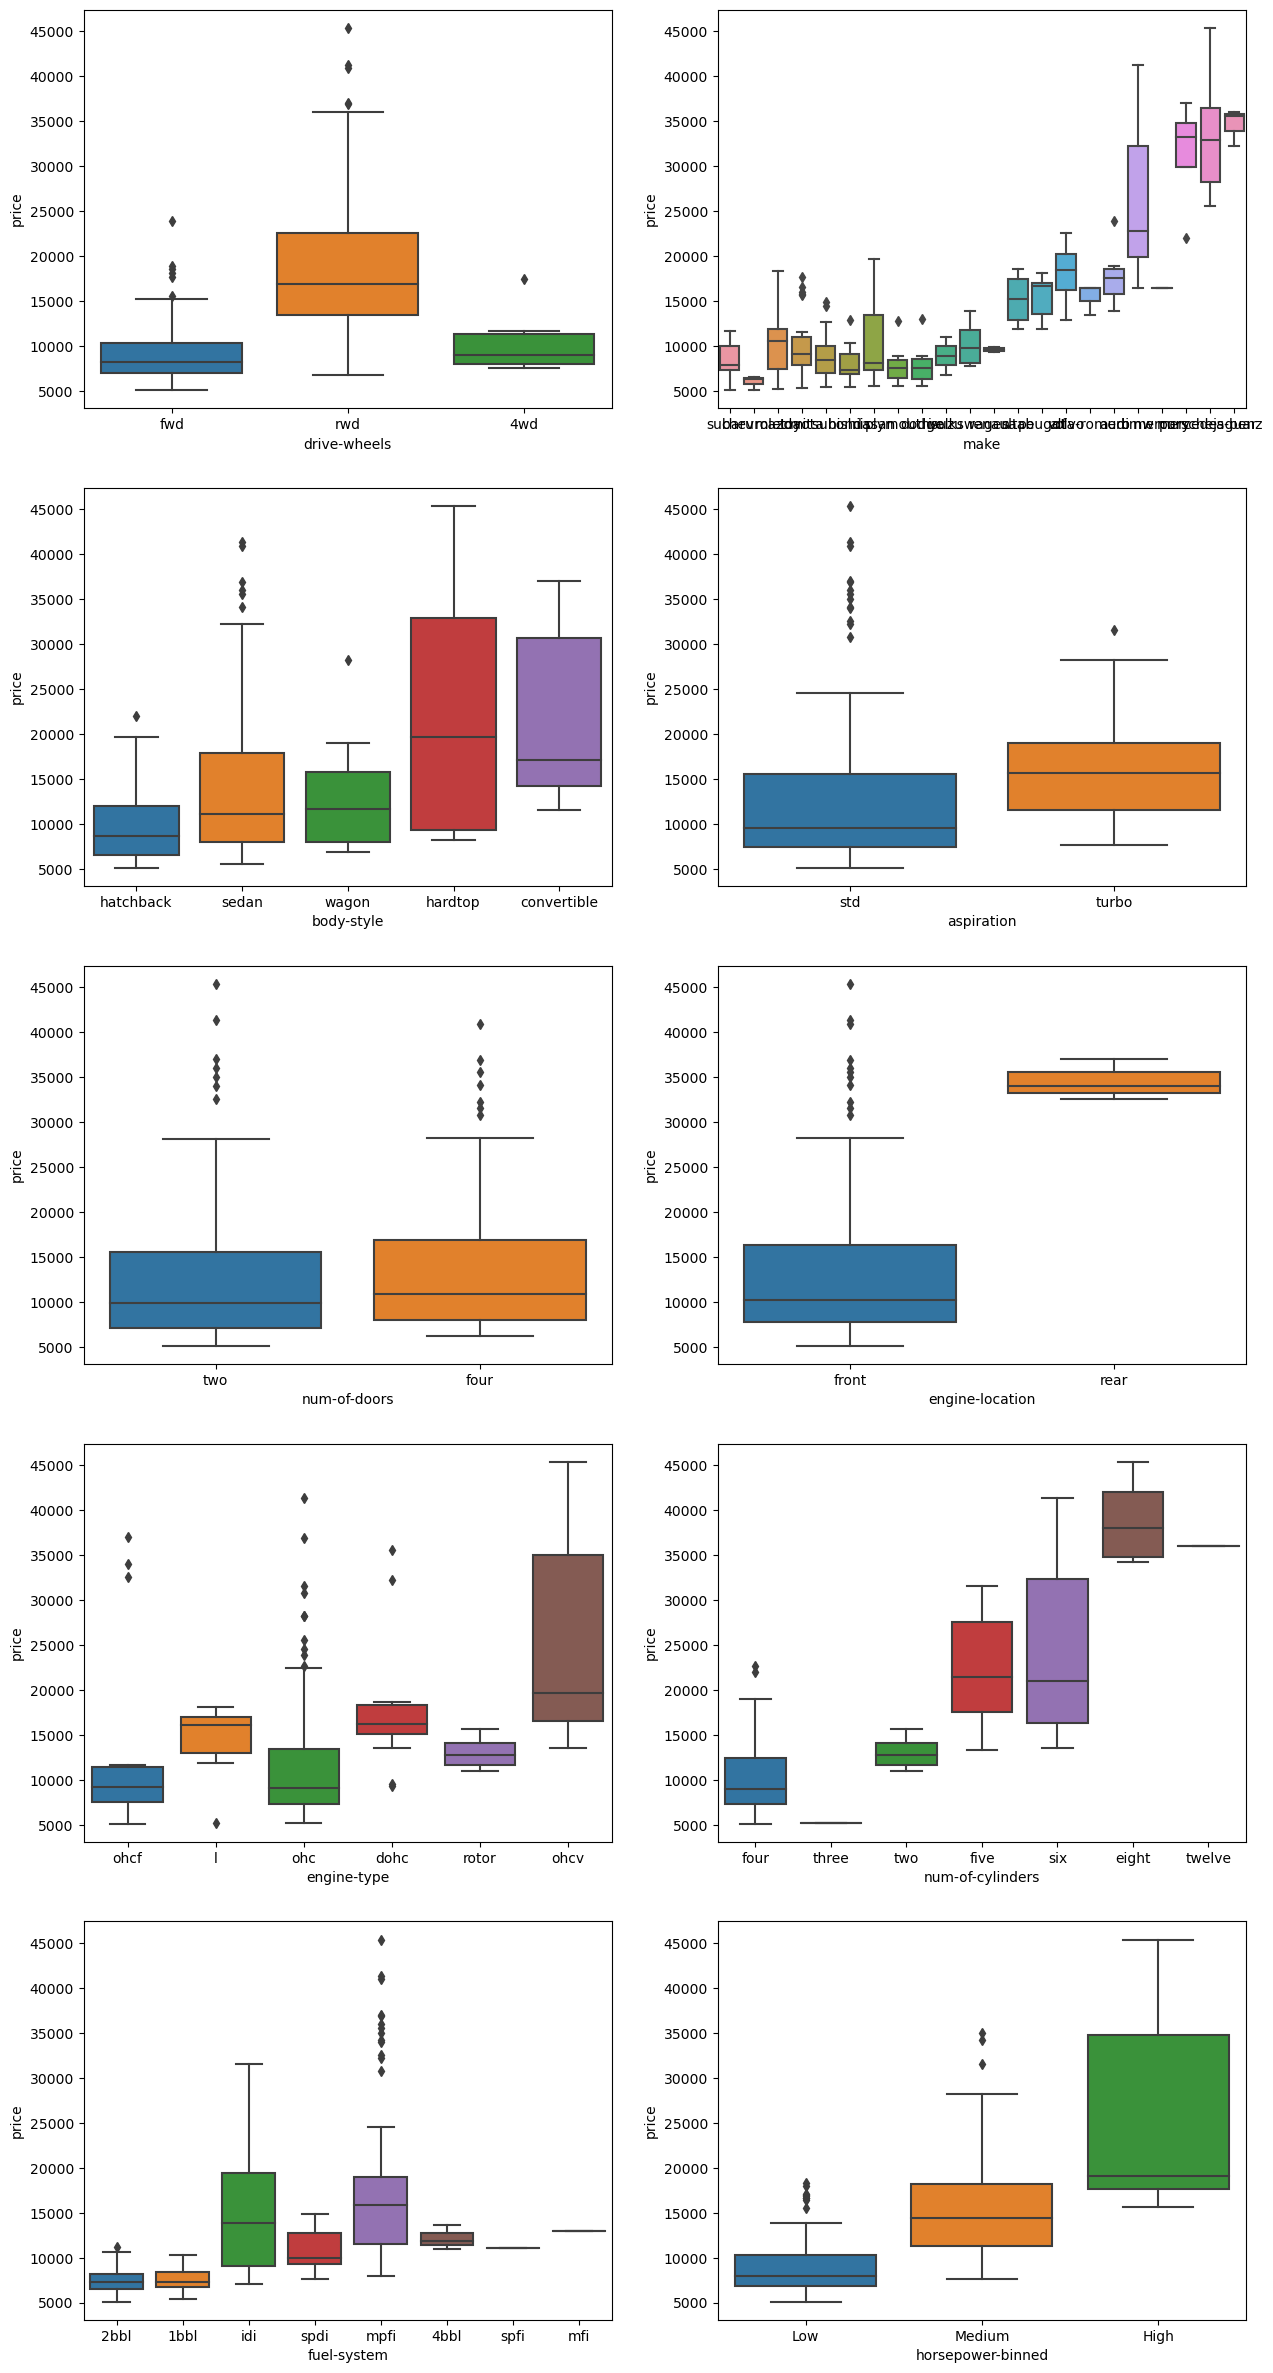

In [43]:
fig=plt.figure(figsize=(15,30))
ax1=fig.add_subplot(521)
ax2=fig.add_subplot(522)
ax3=fig.add_subplot(523)
ax4=fig.add_subplot(524)
ax5=fig.add_subplot(525)
ax6=fig.add_subplot(526)
ax7=fig.add_subplot(527)
ax8=fig.add_subplot(528)
ax9=fig.add_subplot(529)
ax10=fig.add_subplot(5,2,10)
#
sns.boxplot(x="drive-wheels", y="price", data=df,ax=ax1)
sns.boxplot(x="make", y="price", data=df,ax=ax2)
sns.boxplot(x="body-style", y="price", data=df,ax=ax3)
sns.boxplot(x="aspiration", y="price", data=df,ax=ax4)
sns.boxplot(x="num-of-doors", y="price", data=df,ax=ax5)
sns.boxplot(x="engine-location", y="price", data=df,ax=ax6)
sns.boxplot(x="engine-type", y="price", data=df,ax=ax7)
sns.boxplot(x="num-of-cylinders", y="price", data=df,ax=ax8)
sns.boxplot(x="fuel-system", y="price", data=df,ax=ax9)
sns.boxplot(x="horsepower-binned", y="price", data=df,ax=ax10)

Si, son muchos gráficos, pero podemos notar algunas cosas:
1) Las categorías "num of doors", "aspiration" y "fuel-system" no dan demasiada información sobre el precio del auto, así que podemos descartarlas.
2) "engine-location" parece ser muy clara, pero mediante el método .describe() vimos que solo hay 3 autos del grupo "rear". Esto genera un sesgo,
por lo que no usaremos esa característica.
3) Las categorías más claras parecen ser "horsepower-binned" y "drive-wheels". Utilicemos entonces el método ANOVA para determinar si son relevantes.